# Time Series EDA

In [43]:
## Install Pandas Data Reader
# !pip install pandas-datareader

from pandas_datareader import data as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import yfinance as yf
yf.pdr_override()

In [45]:
df_tesla = pdr.get_data_yahoo('TSLA')

c:\Users\Ateeth Arun\Anaconda\envs\time-series-env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [46]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<Axes: xlabel='Date'>

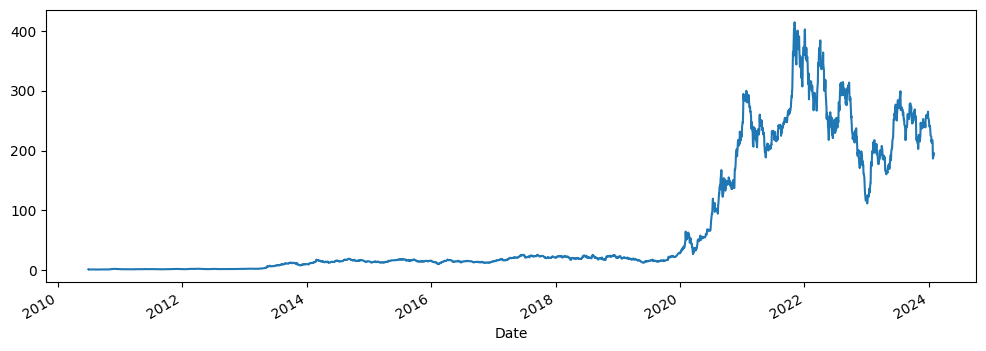

In [47]:
df_tesla['High'].plot(
    figsize=(12,4)
)

<Axes: xlabel='Date'>

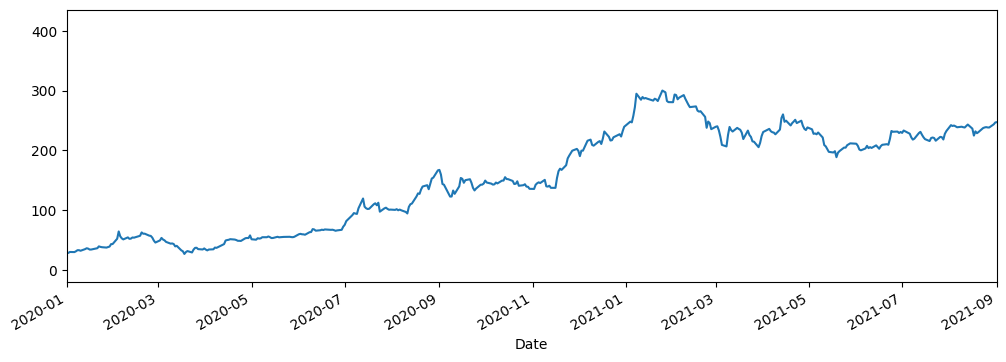

In [48]:
## xlimit and ylimit
df_tesla['High'].plot(
    xlim=['2020-01-01','2021-09-01'], 
    figsize=(12,4)
)

<Axes: xlabel='Date'>

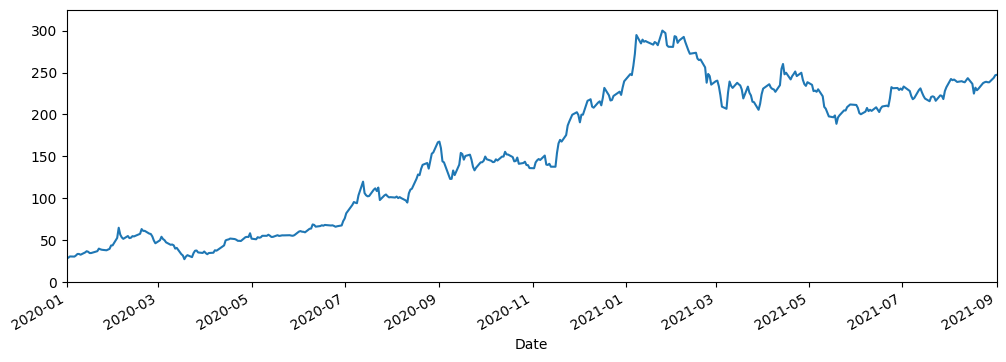

In [49]:
## xlimit and ylimit
df_tesla['High'].plot(
    xlim=['2020-01-01','2021-09-01'], 
    ylim=[0, 325], 
    figsize=(12,4)
)

<Axes: xlabel='Date'>

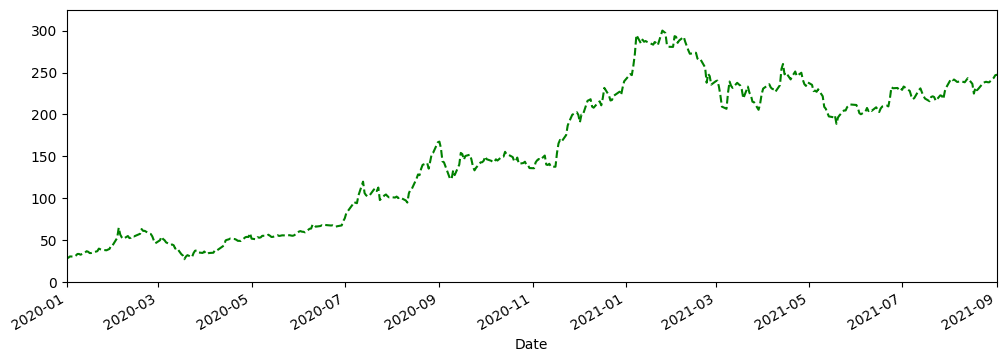

In [50]:
## xlimit and ylimit and coloring
df_tesla['High'].plot(
    xlim=['2020-01-01','2021-09-01'], 
    ylim=[0, 325], 
    figsize=(12,4), 
    ls='--',
    c='green'
)

In [51]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
               '2024-01-30', '2024-01-31'],
              dtype='datetime64[ns]', name='Date', length=3421, freq=None)

In [52]:
index = df_tesla.loc['2020-01-01' : '2021-09-01'].index
share_open = df_tesla.loc['2020-01-01' : '2021-09-01']['Open']

In [53]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [54]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

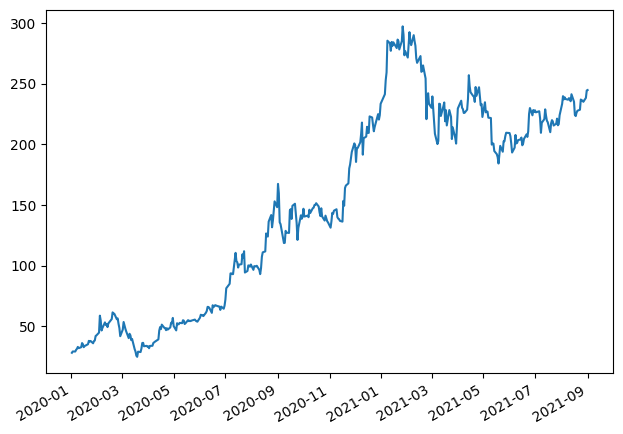

In [55]:
figure,axis = plt.subplots()
plt.tight_layout()
# Prevent overlap of dates in x axis
figure.autofmt_xdate()
axis.plot(index, share_open)

### Datetime index

In [56]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3421 entries, 2010-06-29 to 2024-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3421 non-null   float64
 1   High       3421 non-null   float64
 2   Low        3421 non-null   float64
 3   Close      3421 non-null   float64
 4   Adj Close  3421 non-null   float64
 5   Volume     3421 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.1 KB


#### Get new Date column

In [57]:
df_tesla = df_tesla.reset_index()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3421 non-null   datetime64[ns]
 1   Open       3421 non-null   float64       
 2   High       3421 non-null   float64       
 3   Low        3421 non-null   float64       
 4   Close      3421 non-null   float64       
 5   Adj Close  3421 non-null   float64       
 6   Volume     3421 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 187.2 KB


#### Set Date column as index

In [58]:
df_tesla = df_tesla.set_index(['Date'], drop = True)

In [59]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### Datetime

In [60]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [61]:
datetime.now()

datetime.datetime(2024, 2, 1, 22, 21, 5, 387354)

In [62]:
date = datetime(2021, 11, 21)

In [63]:
date.date()

datetime.date(2021, 11, 21)

In [64]:
date.day

21

In [65]:
date.weekday()

6

In [66]:
date.year

2021

In [67]:
date.month

11

### Time Resampling

#### Article for resample function 

https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

##### Various Rules for resample

In [68]:
resample_rules = pd.read_csv("resample_rules.csv")
resample_rules

,Rule,Meaning
0,B,business day frequency
1,C,custom business day frequency (experimental)
2,D,calendar day frequency
3,W,weekly frequency
4,ME,month end frequency
5,SM,semi-month end frequency (15th and end of month)
6,BM,business month end frequency
7,CBM,custom business month end frequency
8,MS,month start frequency
9,SMS,semi-month start frequency (1st and 15th)


In [69]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


##### Get minimum Open price of each year

C:\Users\Ateeth Arun\AppData\Local\Temp\ipykernel_3636\2029905341.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A')['Open'].min().plot()


<Axes: xlabel='Date'>

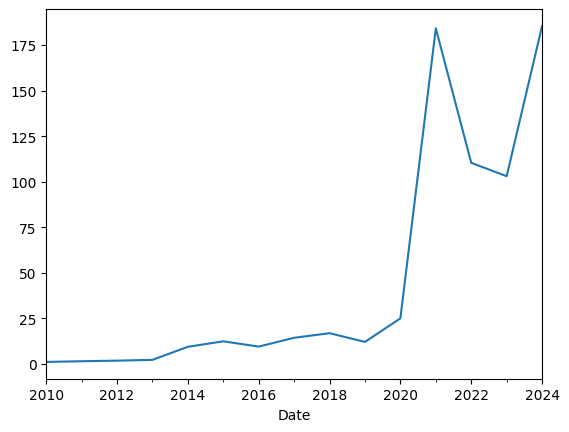

In [70]:
df_tesla.resample(rule='A')['Open'].min().plot()

##### Get maximum Open price of each year

C:\Users\Ateeth Arun\AppData\Local\Temp\ipykernel_3636\1274448513.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A')['Open'].max().plot()


<Axes: xlabel='Date'>

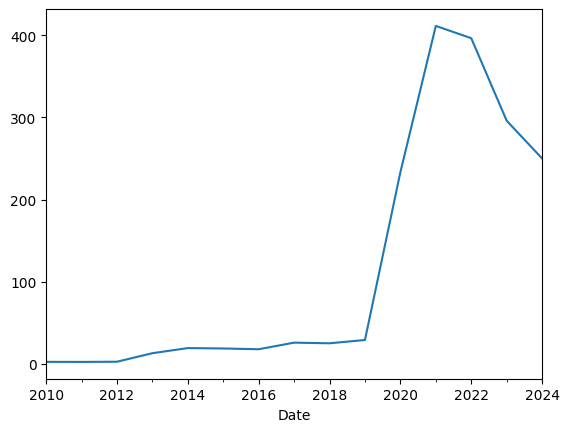

In [71]:
df_tesla.resample(rule='A')['Open'].max().plot()

##### Quaterly data resample high max

<Axes: xlabel='Date'>

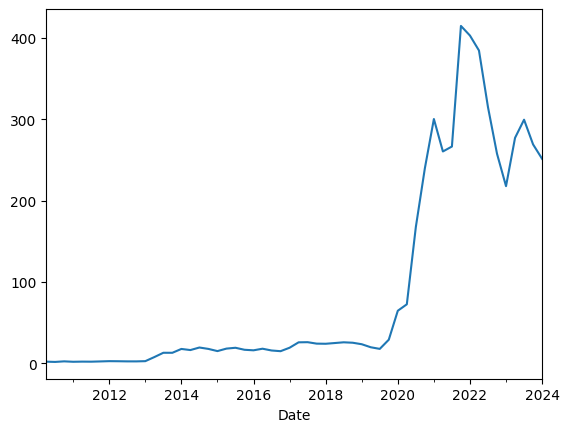

In [72]:
df_tesla.resample(rule = "QS")['High'].max().plot()

##### Business End Frequency

In [73]:
df_tesla.resample(rule = "BA").max()

C:\Users\Ateeth Arun\AppData\Local\Temp\ipykernel_3636\1993153799.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla.resample(rule = "BA").max()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


##### Business Quarters

In [74]:
df_tesla.resample(rule = "BQS").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-03,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-03,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-02,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-02,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


#### Plotting

C:\Users\Ateeth Arun\AppData\Local\Temp\ipykernel_3636\2130775824.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar', figsize=(12, 4))


<Axes: xlabel='Date'>

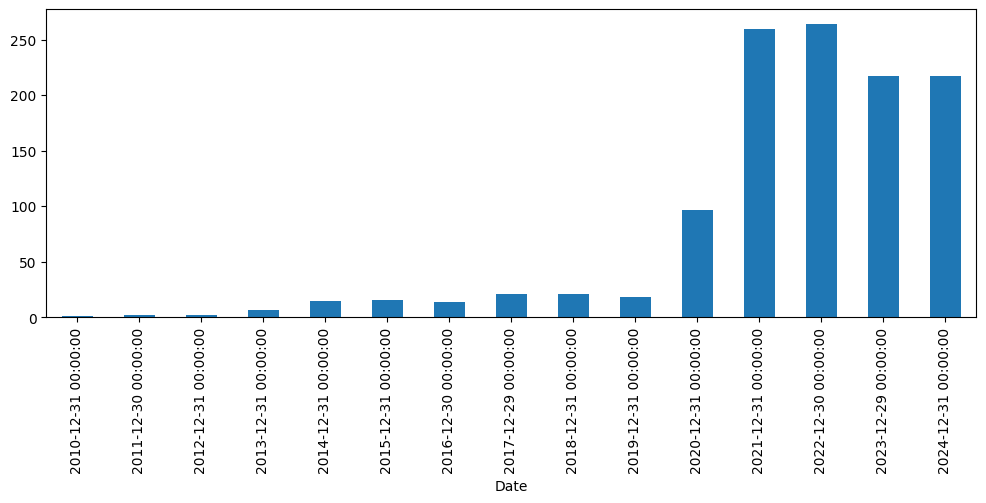

In [75]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar', figsize=(12, 4))

C:\Users\Ateeth Arun\AppData\Local\Temp\ipykernel_3636\2185378555.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_tesla['Open'].resample(rule='Q').max().plot(kind='bar', figsize=(12, 4))


<Axes: xlabel='Date'>

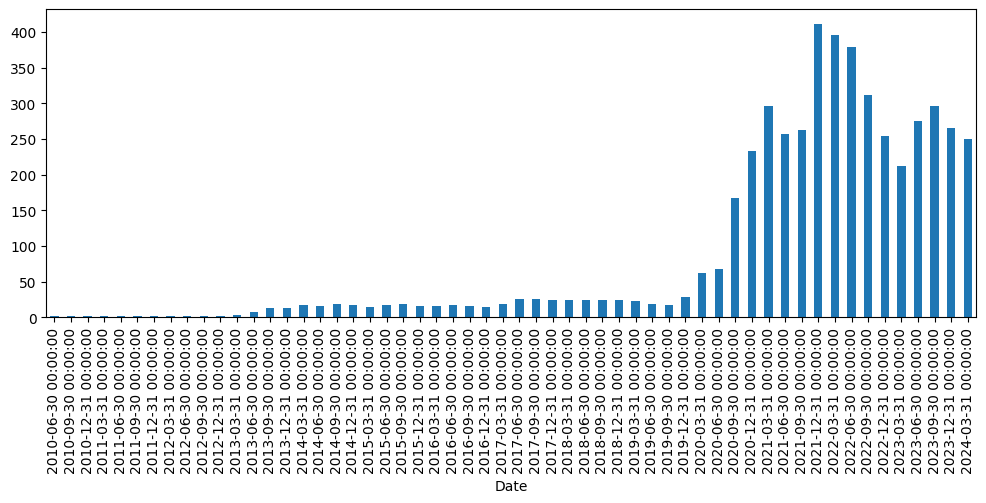

In [76]:
df_tesla['Open'].resample(rule='Q').max().plot(kind='bar', figsize=(12, 4))

#### Use Rolling function

Link to learn more about rolling() : https://www.educative.io/answers/how-to-compute-the-rolling-mean-of-a-time-series-in-python

In [77]:
df_tesla['High'].rolling(3).mean()

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01      1.807556
2010-07-02      1.765333
2010-07-06      1.533778
                 ...    
2024-01-25    207.126663
2024-01-26    197.503332
2024-01-29    190.419998
2024-01-30    191.539998
2024-01-31    193.936666
Name: High, Length: 3421, dtype: float64

In the above output the rolling mean is caluclated as average of 3 as window size for rolling in above snippet is provided as 3

For first 2 observations rolling mean is NaN because they dont have 3 previous records to take mean of

In [80]:
df_tesla['Open :  30 days rolling'] = df_tesla['Open'].rolling(30).mean()

In [81]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open : 30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN


In the above output the rolling mean is caluclated as average of 30 as window size for rolling in above snippet is provided as 30

For first 30 observations rolling mean is NaN because they dont have 30 previous records to take mean of

In [82]:
df_tesla.head(32)

,Open,High,Low,Close,Adj Close,Volume,Open : 30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


In [84]:
df_tesla.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Open :  30 days rolling'],
      dtype='object')

<Axes: xlabel='Date'>

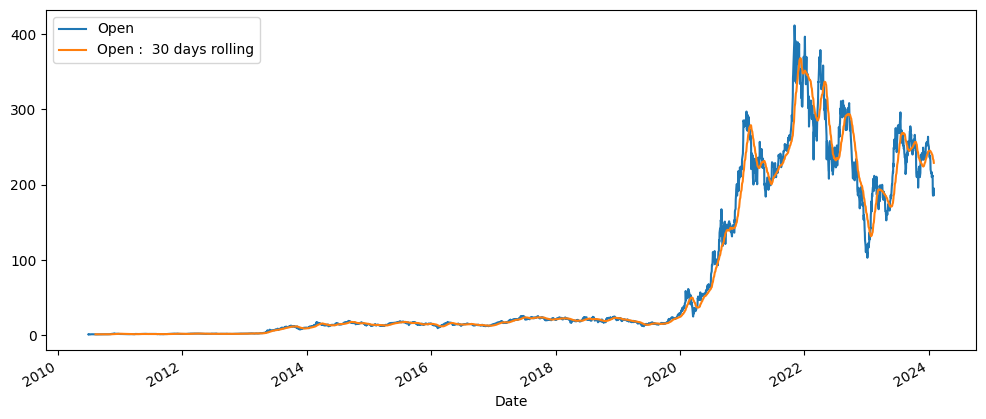

In [85]:
df_tesla[['Open', 'Open :  30 days rolling']].plot(figsize=(12,5))

#### Rolling can be used for smoothening the graph